In [ ]:
# import koreanize_matplotlib
# %config InlineBackend.figure_format = 'retina'

In [ ]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
raw_path = '/content/drive/MyDrive/Colab Notebooks/프로젝트/datathon/data/'
customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [ ]:
# column명 변경
geolocation.columns = ['customer_zip_code_prefix', 
                       'geolocation_lat', 
                       'geolocation_lng',
                       'geolocation_city', 
                       'geolocation_state']

olist_sellers.columns = ['seller_id', 
                         'customer_zip_code_prefix', 
                         'seller_city', 
                         'seller_state']

In [ ]:
# 필요한 데이터 합치기
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')
df_all.shape

(119143, 35)

In [ ]:
# yearmonth 변수 만들기
df_all['yearmonth'] = df_all['order_purchase_timestamp'].map(lambda x:x[:7])
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['year'] = df_all['order_purchase_timestamp'].dt.year
df_all['month'] = df_all['order_purchase_timestamp'].dt.month
df_all['hour'] = df_all['order_purchase_timestamp'].dt.hour
df_all[['yearmonth', 'year', 'month', 'hour']]

,yearmonth,year,month,hour
0,2017-10,2017,10,10
1,2017-10,2017,10,10
2,2017-10,2017,10,10
3,2017-08,2017,8,18
4,2017-08,2017,8,18
...,...,...,...,...
119138,2018-07,2018,7,10
119139,2017-03,2017,3,19
119140,2018-07,2018,7,9
119141,2018-05,2018,5,21


In [ ]:
# 카테고리 딕셔너리를 이용하여 카테고리 영문으로 바꾸기
category_dict = {'perfumaria': 'perfumery', 'artes': 'art', 'esporte_lazer': 'sports_leisure', 'bebes': 'baby', 
                 'utilidades_domesticas': 'housewares', 'instrumentos_musicais': 'musical_instruments', 'cool_stuff': 'cool_stuff', 
                 'moveis_decoracao': 'furniture_decor', 'eletrodomesticos': 'home_appliances', 'brinquedos': 'toys', 
                 'cama_mesa_banho': 'bed_bath_table', 'construcao_ferramentas_seguranca': 'construction_tools_safety', 
                 'informatica_acessorios': 'computers_accessories', 'beleza_saude': 'health_beauty', 'malas_acessorios': 'luggage_accessories', 
                 'ferramentas_jardim': 'garden_tools', 'moveis_escritorio': 'office_furniture', 'automotivo': 'auto', 'eletronicos': 'electronics', 
                 'fashion_calcados': 'fashion_shoes', 'telefonia': 'telephony', 'papelaria': 'stationery', 
                 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories', 'pcs': 'computers', 'casa_construcao': 'home_construction', 
                 'relogios_presentes': 'watches_gifts', 'construcao_ferramentas_construcao': 'construction_tools_construction', 
                 'pet_shop': 'pet_shop', 'eletroportateis': 'small_appliances', 'agro_industria_e_comercio': 'agro_industry_and_commerce', 
                 'moveis_sala': 'furniture_living_room', 'sinalizacao_e_seguranca': 'signaling_and_security', 'climatizacao': 'air_conditioning', 
                 'consoles_games': 'consoles_games', 'livros_interesse_geral': 'books_general_interest', 
                 'construcao_ferramentas_ferramentas': 'costruction_tools_tools', 'fashion_underwear_e_moda_praia': 'fashion_underwear_beach', 
                 'fashion_roupa_masculina': 'fashion_male_clothing', 
                 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_dining_laundry_garden_furniture', 
                 'industria_comercio_e_negocios': 'industry_commerce_and_business', 'telefonia_fixa': 'fixed_telephony', 
                 'construcao_ferramentas_iluminacao': 'construction_tools_lights', 'livros_tecnicos': 'books_technical', 
                 'eletrodomesticos_2': 'home_appliances_2', 'artigos_de_festas': 'party_supplies', 'bebidas': 'drinks', 
                 'market_place': 'market_place', 'la_cuisine': 'la_cuisine', 'construcao_ferramentas_jardim': 'costruction_tools_garden', 
                 'fashion_roupa_feminina': 'fashio_female_clothing', 'casa_conforto': 'home_confort', 'audio': 'audio', 
                 'alimentos_bebidas': 'food_drink', 'musica': 'music', 'alimentos': 'food', 'tablets_impressao_imagem': 'tablets_printing_image', 
                 'livros_importados': 'books_imported', 'portateis_casa_forno_e_cafe': 'small_appliances_home_oven_and_coffee', 
                 'fashion_esporte': 'fashion_sport', 'artigos_de_natal': 'christmas_supplies', 
                 'fashion_roupa_infanto_juvenil': 'fashion_childrens_clothes', 'dvds_blu_ray': 'dvds_blu_ray', 
                 'artes_e_artesanato': 'arts_and_craftmanship', 'moveis_quarto': 'furniture_bedroom', 'cine_foto': 'cine_photo', 
                 'fraldas_higiene': 'diapers_and_hygiene', 'flores': 'flowers', 'casa_conforto_2': 'home_comfort_2', 
                 'seguros_e_servicos': 'security_and_services', 'moveis_colchao_e_estofado': 'furniture_mattress_and_upholstery', 
                 'cds_dvds_musicais': 'cds_dvds_musicals'}
df_all = df_all.replace(to_replace=category_dict)

In [ ]:
# 카테고리별, yearmonth별 오더 권수 정리하기
order_count = pd.DataFrame(df_all.groupby(['yearmonth', 'product_category_name'], as_index=False)['order_id'].count())
order_count

,yearmonth,product_category_name,order_id
0,2016-09,furniture_decor,2
1,2016-09,health_beauty,3
2,2016-09,telephony,1
3,2016-10,air_conditioning,10
4,2016-10,audio,2
...,...,...,...
1257,2018-08,stationery,172
1258,2018-08,telephony,289
1259,2018-08,toys,170
1260,2018-08,watches_gifts,428


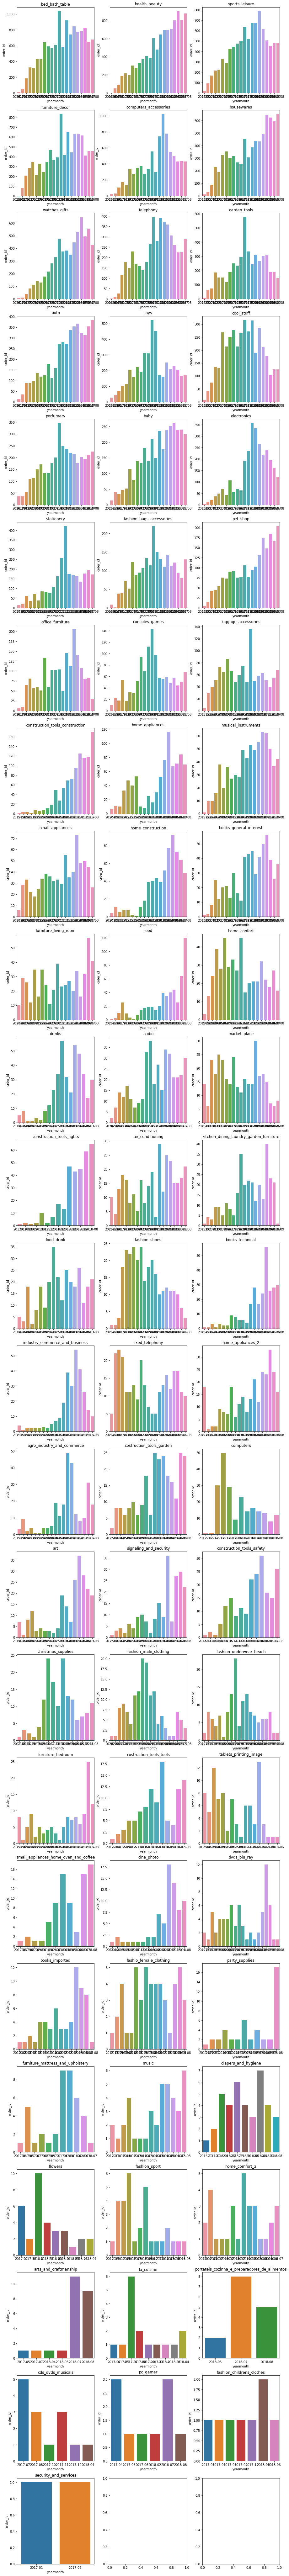

In [ ]:
# 전체 카테고리 시각화
categories = df_all['product_category_name'].value_counts().sort_values(ascending=False).index

fig, axes = plt.subplots(ncols=3, nrows= 25, figsize=(15, 150))

for i in range(len(categories)):
    row = i // 3
    column = i % 3
    axes[row, column].set_title(categories[i])
    sns.barplot(data=order_count[order_count['product_category_name'] == categories[i]], 
                x='yearmonth', y='order_id', 
                ax=axes[row, column])

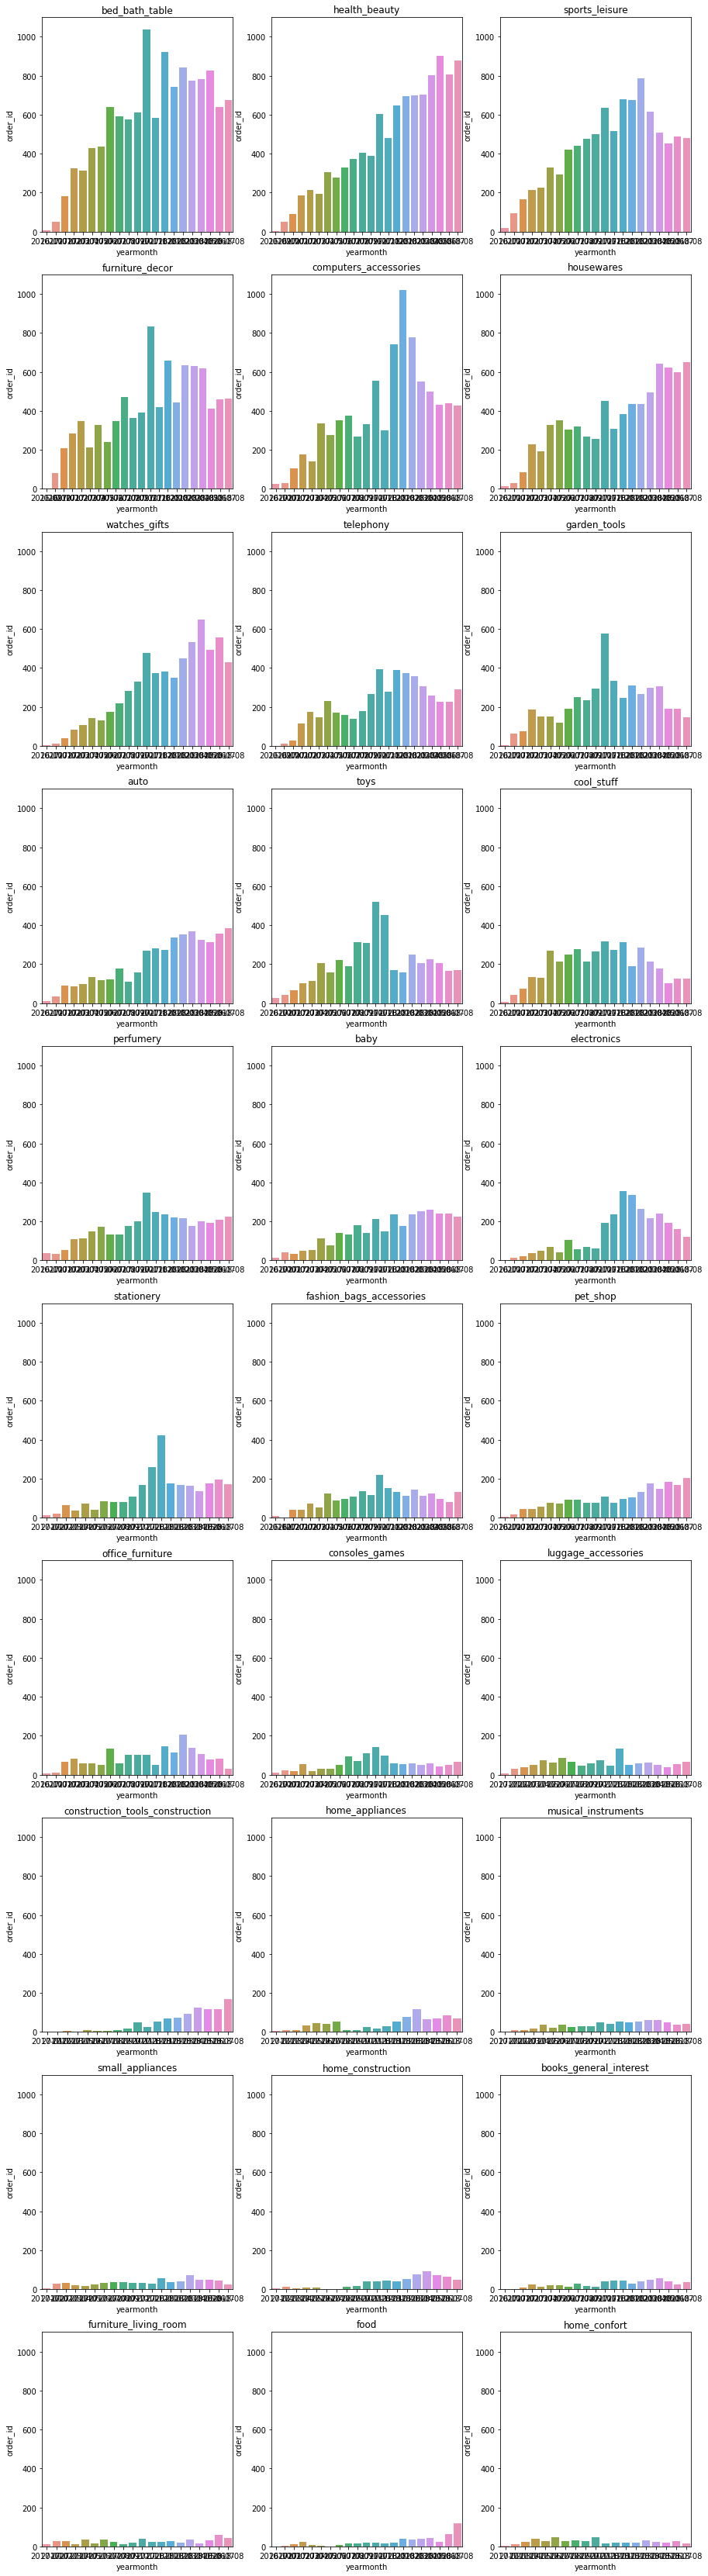

In [ ]:
# top 30 카테고리만 가져오기
top_30_cat = df_all['product_category_name'].value_counts().sort_values(ascending=False).head(30).index
top_30_cat_df = df_all[df_all['product_category_name'].isin(top_30_cat)]
top_30_cat_ym = pd.DataFrame(top_30_cat_df.groupby(['yearmonth', 'product_category_name'], as_index=False)['order_id'].count())


# top 30 카테고리 시각화
fig, axes = plt.subplots(ncols=3, nrows= 10, figsize=(15,60))

for i in range(30):
    row = i // 3
    column = i % 3
    axes[row, column].set_ylim(0, 1100)
    axes[row, column].set_title(top_30_cat[i])
    sns.barplot(data=top_30_cat_ym[top_30_cat_ym['product_category_name'] == top_30_cat[i]], 
                x='yearmonth', y='order_id', 
                ax=axes[row, column])

In [ ]:
top_30_cat

Index(['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
       'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
       'garden_tools', 'auto', 'toys', 'cool_stuff', 'perfumery', 'baby',
       'electronics', 'stationery', 'fashion_bags_accessories', 'pet_shop',
       'office_furniture', 'consoles_games', 'luggage_accessories',
       'construction_tools_construction', 'home_appliances',
       'musical_instruments', 'small_appliances', 'home_construction',
       'books_general_interest', 'furniture_living_room', 'food',
       'home_confort'],
      dtype='object')

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

왜도 = [skew(top_30_cat_ym.loc[top_30_cat_ym['product_category_name'] == top_30_cat[i], 
                             'order_id']) for i in range(30)]
    
    
첨도 = [kurtosis(top_30_cat_ym.loc[top_30_cat_ym['product_category_name'] == top_30_cat[i], 
                                 'order_id'], fisher=True) for i in range(30)]

skew_kurt = pd.DataFrame({'product_category_name':top_30_cat, '왜도':왜도, '첨도':첨도})
skew_kurt

,product_category_name,왜도,첨도
0,bed_bath_table,-0.512254,-0.446050
1,health_beauty,0.066010,-1.246710
2,sports_leisure,-0.329205,-0.597202
3,furniture_decor,0.091370,-0.074614
4,computers_accessories,0.734364,0.376572
5,housewares,-0.066545,-0.690224
6,watches_gifts,0.024265,-1.214725
7,telephony,-0.230108,-0.678011
8,garden_tools,0.900763,1.894873
9,auto,-0.005808,-1.481080


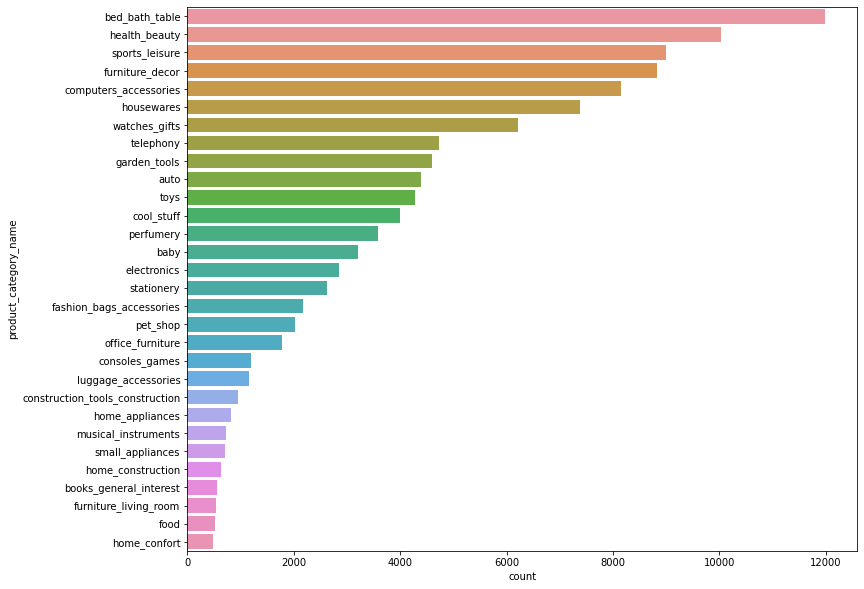

In [ ]:
top_30_cat_df
plt.figure(figsize=(12, 10))
sns.countplot(data=top_30_cat_df,
              y=top_30_cat_df['product_category_name'],
              order = top_30_cat_df['product_category_name'].value_counts().index);

### 매출액

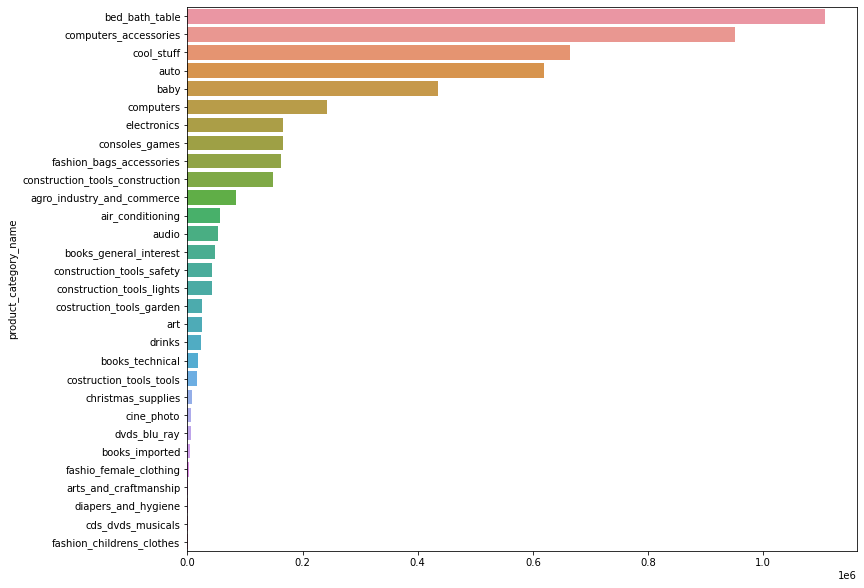

In [ ]:
price_top30_cat = df_all.groupby(['product_category_name'])['price'].sum()[:30].sort_values(ascending =False)
plt.figure(figsize=(12, 10))
sns.barplot(x = price_top30_cat.values,
            y = price_top30_cat.index);

In [ ]:
df_all[df_all['product_category_name'].isin(price_top30_cat.index)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,yearmonth,year,month,hour
6,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,...,398.0,3.0,238.0,20.0,10.0,15.0,2017-08,2017,8,13
7,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,...,398.0,3.0,238.0,20.0,10.0,15.0,2017-08,2017,8,2
8,4f2acff0b7d2bcc4a408abe5a223d407,d67b6cca5a87299f711a6961f579fe67,delivered,2017-08-01 16:31:35,2017-08-02 02:50:25,2017-08-03 14:36:34,2017-08-09 19:56:50,2017-08-23 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,...,398.0,3.0,238.0,20.0,10.0,15.0,2017-08,2017,8,16
9,019aaee09698daf81dcffe9d94a18b5c,e3893e579755de4feb1a4d0313c103fa,delivered,2017-08-10 14:04:58,2017-08-10 14:23:38,2017-08-11 13:52:35,2017-08-12 11:56:49,2017-08-23 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,...,398.0,3.0,238.0,20.0,10.0,15.0,2017-08,2017,8,14
10,e37531db8933bdce0f86e9dc3768759e,74380820e581b5e8585abc1b5e11c079,delivered,2017-08-07 21:48:23,2017-08-07 22:25:11,2017-08-08 13:00:00,2017-08-16 11:42:26,2017-08-29 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,...,398.0,3.0,238.0,20.0,10.0,15.0,2017-08,2017,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119129,39e89b39b5cc8b5e3a38f23e915d1823,2b91bc260dcffbdacd12c4b09e5c7463,delivered,2017-07-24 11:29:43,2017-07-24 11:43:21,2017-07-24 22:34:38,2017-08-10 19:42:10,2017-08-23 00:00:00,1.0,24fcd474105d95d2002f38f0cacf87ee,...,62.0,1.0,700.0,16.0,7.0,11.0,2017-07,2017,7,11
119131,fbff77db5421bb7e1da292db45d07e75,7795e3faa6e16fc40aafee568b25a85d,delivered,2017-03-15 11:41:46,2017-03-15 11:41:46,2017-03-16 04:19:03,2017-03-20 10:34:54,2017-04-03 00:00:00,1.0,654ccc4e5459e7ba6b8d9fb04c45b9db,...,1403.0,1.0,300.0,28.0,2.0,18.0,2017-03,2017,3,11
119132,fbff77db5421bb7e1da292db45d07e75,7795e3faa6e16fc40aafee568b25a85d,delivered,2017-03-15 11:41:46,2017-03-15 11:41:46,2017-03-16 04:19:03,2017-03-20 10:34:54,2017-04-03 00:00:00,1.0,654ccc4e5459e7ba6b8d9fb04c45b9db,...,1403.0,1.0,300.0,28.0,2.0,18.0,2017-03,2017,3,11
119138,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1.0,31ec3a565e06de4bdf9d2a511b822b4d,...,516.0,2.0,750.0,30.0,28.0,28.0,2018-07,2018,7,10


In [ ]:
df = df_all.groupby(['yearmonth', 'product_category_name'])['price'].sum().unstack(level=-1)
df = df.fillna(0)
df = round(df, 2)
df.style.background_gradient(cmap='coolwarm')

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,portateis_cozinha_e_preparadores_de_alimentos,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
yearmonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.890000,0.000000,0.000000,0.000000,134.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,0.000000,0.000000
2016-10,0.000000,1707.090000,0.000000,0.000000,156.990000,1833.250000,1630.160000,478.990000,119.500000,0.000000,267.000000,0.000000,0.000000,0.000000,0.000000,1573.220000,3882.260000,0.000000,0.000000,0.000000,1111.000000,0.000000,0.000000,134.900000,0.000000,0.000000,1306.990000,54.900000,508.300000,0.000000,24.900000,29.990000,0.000000,0.000000,704.880000,0.000000,79.900000,0.000000,0.000000,6521.870000,0.000000,0.000000,1359.880000,4672.310000,0.000000,0.000000,0.000000,0.000000,0.000000,1287.070000,359.600000,0.000000,0.000000,0.000000,1386.090000,0.000000,0.000000,1300.880000,0.000000,0.000000,5782.400000,1069.660000,0.000000,0.000000,0.000000,0.000000,0.000000,3333.640000,0.000000,0.000000,500.080000,4465.090000,3360.240000
2016-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,65.970000,663.700000,0.000000,0.000000,0.000000,5218.530000,6397.870000,4209.950000,234.890000,0.000000,0.000000,0.000000,0.000000,0.000000,2199.990000,3924.140000,5954.200000,310.000000,0.000000,0.000000,7860.920000,0.000000,0.000000,0.000000,0.000000,29.800000,677.000000,77.300000,1880.770000,0.000000,126.900000,34.900000,0.000000,137.250000,677.120000,0.000000,42.820000,0.000000,73.200000,15161.900000,1241.900000,0.000000,8871.730000,15605.220000,0.000000,4225.680000,72.800000,0.000000,0.000000,2855.480000,0.000000,110.000000,0.000000,

In [ ]:
df

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
yearmonth,,,,,,,,,,,,,,,,,,,,,
2016-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,59.50,0.00,0.00
2016-10,0.00,1707.09,0.00,0.00,156.99,1833.25,1630.16,478.99,119.50,0.00,...,0.00,0.00,0.00,0.00,3333.64,0.00,0.00,500.08,4465.09,3360.24
2016-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-01,65.97,663.70,0.00,0.00,0.00,5218.53,6397.87,4209.95,234.89,0.00,...,183.29,0.00,1660.79,0.00,10785.26,1561.99,0.00,2945.86,4943.99,8086.52
2017-02,268.82,3204.30,0.00,0.00,213.60,13373.10,3048.48,18620.29,772.71,99.00,...,0.00,0.00,7251.58,0.00,17208.08,2471.30,792.00,7059.07,9508.33,11842.21
2017-03,81.99,4453.81,279.25,0.00,1134.77,14621.97,4057.87,28270.28,2648.96,0.00,...,0.00,75.00,12129.06,0.00,33040.95,6069.12,495.00,8319.99,12466.37,26890.28
2017-04,0.00,2582.23,119.90,0.00,1032.10,16968.08,4100.35,28109.53,923.38,19.99,...,0.00,128.06,27252.98,0.00,26001.87,4606.34,1127.78,7634.73,13404.21,25559.47
2017-05,1579.94,1016.77,6967.65,21.99,2081.18,19837.23,10395.20,38405.91,1841.57,0.00,...,0.00,508.85,5241.44,0.00,37281.75,6371.87,1514.98,9882.57,22989.54,40626.75
2017-06,1390.00,2084.48,447.70,0.00,1671.00,31877.58,7904.64,38658.19,1940.08,99.00,...,0.00,273.90,9906.79,71.90,33912.02,3493.57,792.00,9283.54,15596.25,30601.50


In [ ]:
# top_order = df_all.groupby(["product_category_name"]).agg({"order_id":"count"}).sort_values("order_id", ascending=False).index
# top_selling = df_all.groupby(["product_category_name"]).agg({"price":"sum"}).sort_values("price", ascending=False).index

price_seller = df_all.groupby(["yearmonth", "product_category_name"]).agg({"price":"sum", "seller_id":pd.Series.nunique})
price_seller["ratio"] = round(price_seller["price"] / price_seller["seller_id"], 2)

price = price_seller["price"].unstack(-2).fillna(0)
seller = price_seller["seller_id"].unstack(-2).fillna(0)
price_ratio = price_seller["ratio"].unstack(-2).fillna(0)

15


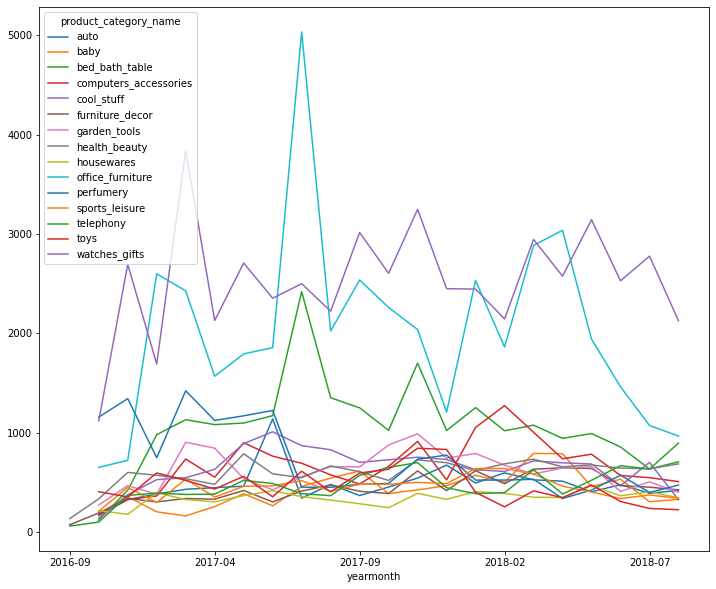

In [ ]:
# df_all = pd.read_csv(raw_path + 'all.csv')

top_selling = df_all.groupby(["product_category_name"]).agg({"price":"sum"}).sort_values("price", ascending=False).index
# top_selling[:10]

temp_l = list(top_selling[:15])
print(len(temp_l))
# temp_l

condition = df_all["product_category_name"].map(lambda x: True if x in temp_l else False)

df_all_top = df_all.loc[condition, :]

temp = df_all_top.groupby(["yearmonth", "product_category_name"]).agg({"price":"sum", "seller_id":'nunique'})
temp["ratio"] = round(temp["price"] / temp["seller_id"], 2)

# display(df_all_top.groupby(["yearmonth", "product_category_name"]).agg({"price":"sum", "seller_id":'count'}))
# display(df_all_top.groupby(["yearmonth", "product_category_name"]).agg({"price":"sum", "seller_id":'nunique'}))
temp.unstack()["ratio"].plot(figsize=(12, 10));

In [ ]:
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,yearmonth,year,month,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,2017,10,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,2017,10,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,2017,10,10
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-08,2017,8,18
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2017-08,2017,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1.0,31ec3a565e06de4bdf9d2a511b822b4d,...,516.0,2.0,750.0,30.0,28.0,28.0,2018-07,2018,7,10
119139,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,1.0,241a1ffc9cf969b27de6e72301020268,...,260.0,2.0,400.0,16.0,4.0,11.0,2017-03,2017,3,19
119140,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1.0,1d187e8e7a30417fda31e85679d96f0f,...,729.0,2.0,2100.0,80.0,8.0,30.0,2018-07,2018,7,9
119141,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1.0,6e1c2008dea1929b9b6c27fa01381e90,...,531.0,1.0,5900.0,41.0,21.0,41.0,2018-05,2018,5,21


In [ ]:
order_seller = df_all.groupby(["yearmonth", "product_category_name"]).agg({"order_id":"count", "seller_id":pd.Series.nunique})
order_seller

# round(order_seller["order_id"] / order_seller["seller_id"], 2)


order_id  seller_id
yearmonth product_category_name                                       
2016-09   furniture_decor                                 2          1
          health_beauty                                   3          1
          telephony                                       1          1
2016-10   air_conditioning                               10          2
          audio                                           2          1
...                                                     ...        ...
2018-08   stationery                                    172         59
          telephony                                     289         44
          toys                                          170         79
          watches_gifts                                 428         36
2018-09   kitchen_dining_laundry_garden_furniture         1          1

[1262 rows x 2 columns]

In [ ]:
df_all.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'yearmonth', 'year', 'month', 'hour'],
      dtype='object')

In [ ]:
df_all[df_all['order_item_id'] == 21]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,yearmonth,year,month,hour
109327,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,21.0,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,152.0,2.0,1000.0,25.0,6.0,12.0,2017-07,2017,7,18


In [ ]:
df_all['product_id']

0         87285b34884572647811a353c7ac498a
1         87285b34884572647811a353c7ac498a
2         87285b34884572647811a353c7ac498a
3         87285b34884572647811a353c7ac498a
4         87285b34884572647811a353c7ac498a
                        ...               
119138    31ec3a565e06de4bdf9d2a511b822b4d
119139    241a1ffc9cf969b27de6e72301020268
119140    1d187e8e7a30417fda31e85679d96f0f
119141    6e1c2008dea1929b9b6c27fa01381e90
119142    9c1e194db1d35a79d962ea610bfe0868
Name: product_id, Length: 119143, dtype: object

In [ ]:
df_all.loc[(df_all['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef'), ['order_id','product_id', 'product_category_name', 'price']]

,order_id,product_id,product_category_name,price
109307,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109308,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109309,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109310,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109311,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109312,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109313,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109314,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109315,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2
109316,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,health_beauty,1.2


### 티어표 드가자

In [ ]:
df_all['order_status'].value_counts(1)

delivered      0.971295
shipped        0.010542
canceled       0.006295
unavailable    0.005472
invoiced       0.003173
processing     0.003156
created        0.000042
approved       0.000025
Name: order_status, dtype: float64

In [ ]:
print(df_all.shape)
df_all = df_all[df_all['order_status'] != 'canceled'].reset_index(drop=True)
df_all.shape

(119143, 39)


(118393, 39)

In [ ]:
df_all.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'yearmonth', 'year', 'month', 'hour'],
      dtype='object')

In [ ]:
ym = df_all['yearmonth'].value_counts(1).index.sort_values().values
ym

array(['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09'],
      dtype=object)

In [ ]:
cols = ['order_id', 'product_id', 'seller_id', 'price', 'product_category_name']

df_1609 = df_all.loc[df_all['yearmonth'] == '2016-09', cols]
df_1610 = df_all.loc[df_all['yearmonth'] == '2016-10', cols]
df_1612 = df_all.loc[df_all['yearmonth'] == '2016-12', cols]
df_1701 = df_all.loc[df_all['yearmonth'] == '2017-01', cols]
df_1702 = df_all.loc[df_all['yearmonth'] == '2017-02', cols]
df_1703 = df_all.loc[df_all['yearmonth'] == '2017-03', cols]
df_1704 = df_all.loc[df_all['yearmonth'] == '2017-04', cols]
df_1705 = df_all.loc[df_all['yearmonth'] == '2017-05', cols]
df_1706 = df_all.loc[df_all['yearmonth'] == '2017-06', cols]
df_1707 = df_all.loc[df_all['yearmonth'] == '2017-07', cols]
df_1708 = df_all.loc[df_all['yearmonth'] == '2017-08', cols]
df_1709 = df_all.loc[df_all['yearmonth'] == '2017-09', cols]
df_1710 = df_all.loc[df_all['yearmonth'] == '2017-10', cols]
df_1711 = df_all.loc[df_all['yearmonth'] == '2017-11', cols]
df_1712 = df_all.loc[df_all['yearmonth'] == '2017-12', cols]
df_1801 = df_all.loc[df_all['yearmonth'] == '2018-01', cols]
df_1802 = df_all.loc[df_all['yearmonth'] == '2018-02', cols]
df_1803 = df_all.loc[df_all['yearmonth'] == '2018-03', cols]
df_1804 = df_all.loc[df_all['yearmonth'] == '2018-04', cols]
df_1805 = df_all.loc[df_all['yearmonth'] == '2018-05', cols]
df_1806 = df_all.loc[df_all['yearmonth'] == '2018-06', cols]
df_1807 = df_all.loc[df_all['yearmonth'] == '2018-07', cols]
df_1808 = df_all.loc[df_all['yearmonth'] == '2018-08', cols]

df_lst = [df_1609, df_1610, df_1612, 
          df_1701, df_1702, df_1703, df_1704, df_1705, df_1706, 
          df_1707, df_1708, df_1709, df_1710, df_1711, df_1712, 
          df_1801, df_1802, df_1803, df_1804, df_1805, df_1806,
          df_1807, df_1808]

for i in df_lst:
    print(i.shape, end=' ')

(5, 5) (375, 5) (1, 5) (1032, 5) (2106, 5) (3209, 5) (2850, 5) (4443, 5) (3834, 5) (4910, 5) (5235, 5) (5166, 5) (5651, 5) (9145, 5) (6632, 5) (8617, 5) (7975, 5) (8586, 5) (8259, 5) (8220, 5) (7382, 5) (7321, 5) (7438, 5) 

In [ ]:
def evaluation_table(df):
    res = df.groupby('product_category_name').agg({"order_id":"count", "product_id":'nunique', "seller_id":'nunique', 'price':'sum'})
    res['price_mean'] = round(res['price']/res['seller_id'], 2)
    res['order_mean'] = round(res['order_id']/res['seller_id'], 2)
    res['price_std'] = 0
    res['order_std'] = 0
    res = res.reset_index()

    a = df.groupby(['seller_id', 'product_category_name']).agg({"order_id":"count", "product_id":'nunique', 'price':'sum'}).reset_index()

    # 표준편차
    for i in range(len(res)):
        # price_std
        d = a.loc[a['product_category_name'] == res.iloc[i, 0], 'price'] - res.iloc[i, 5]
        s = round((sum(d**2)/len(d))**1/2, 2)
        res.iloc[i, 7] = s

        # order_std
        d = a.loc[a['product_category_name'] == res.iloc[i, 0], 'order_id'] - res.iloc[i, 6]
        s = round((sum(d**2)/len(d))**1/2, 2)
        res.iloc[i, 8] = s
    
    return res



,price_mean,order_mean,price_std,order_std
count,66.00,66.00,66.00,66.00
mean,641.43,4.45,701571.18,56.27
std,1104.97,3.47,1927352.60,142.60
min,24.97,1.00,0.00,0.00
25%,202.42,2.42,4402.24,0.54
50%,394.50,3.17,115666.72,3.26
75%,634.16,5.00,415114.51,16.98
max,8648.00,18.25,11022197.15,743.22


In [ ]:
evaluation_table_lst = [evaluation_table(i) for i in df_lst]
evaluation_table_dict = dict(zip(df_all['yearmonth'].value_counts(1).index.sort_values().values, evaluation_table_lst))

In [ ]:
evaluation_table_lst[10]

,product_category_name,order_id,product_id,seller_id,price,price_mean,order_mean,price_std,order_std
0,agro_industry_and_commerce,4,1,1,88.00,88.00,4.00,0.00,0.00
1,air_conditioning,16,12,8,4397.63,549.70,2.00,282036.67,0.50
2,art,4,2,2,244.70,122.35,2.00,76.26,0.50
3,audio,9,6,6,1130.50,188.42,1.50,8585.75,0.12
4,auto,176,103,48,22514.71,469.06,3.67,305314.18,10.78
...,...,...,...,...,...,...,...,...,...
58,stationery,81,57,18,6411.81,356.21,4.50,165208.14,21.01
59,tablets_printing_image,7,5,3,549.89,183.30,2.33,25892.23,1.78
60,telephony,137,90,29,10863.30,374.60,4.72,97244.46,6.82
61,toys,188,123,47,18883.85,401.78,4.00,179311.29,14.89


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def market_tier(df):
    if len(df) < 4:
        return 0
    scaler = StandardScaler()
    model = KMeans(n_clusters=4, random_state=42)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(df[['order_id', 'price']])

    market = df[['order_id', 'price']].copy()
    market["cluster"] = pipeline.predict(df[['order_id', 'price']])
    market['product_category_name'] = df['product_category_name']  
    return market

market_tier_lst = [market_tier(i) for i in evaluation_table_lst]

In [ ]:
market_tier_lst = [market_tier(i) for i in evaluation_table_lst]
market_tier_dict = dict(zip(df_all['yearmonth'].value_counts(1).index.sort_values().values, market_tier_lst))

In [ ]:
def cluster_tier(df, zero, one, two, three):
    df['cluster'] = df['cluster'].replace(0, zero)
    df['cluster'] = df['cluster'].replace(1, one)
    df['cluster'] = df['cluster'].replace(2, two)
    df['cluster'] = df['cluster'].replace(3, three)
    
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x='order_id', y='price', hue='cluster', palette="Set1")

    return df

2016-09는 nan이므로 패스합니다~


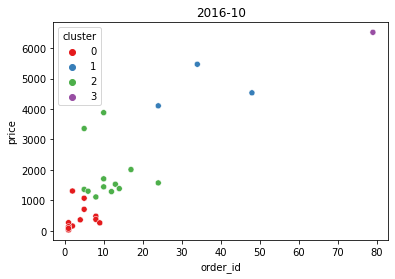

RED: C
BLUE: A
GREEN: B
PURPLE: S


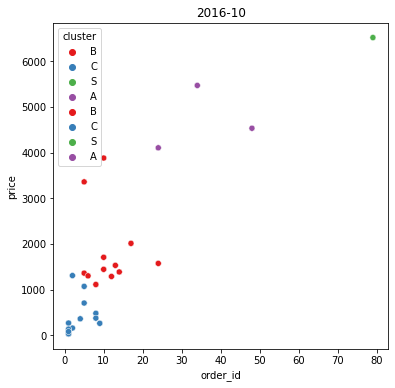

2016-12는 nan이므로 패스합니다~


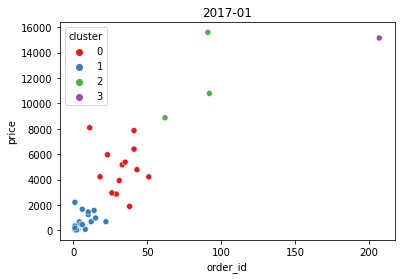

RED: B
BLUE: C
GREEN: A
PURPLE: S


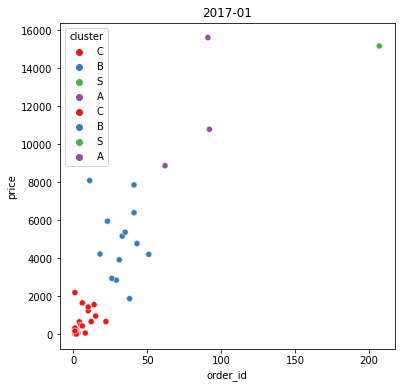

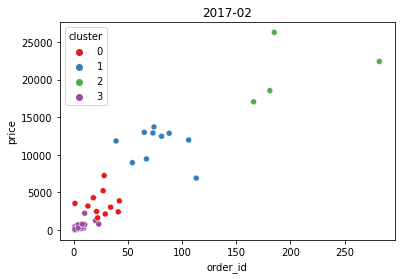

RED: B
BLUE: A
GREEN: S
PURPLE: C


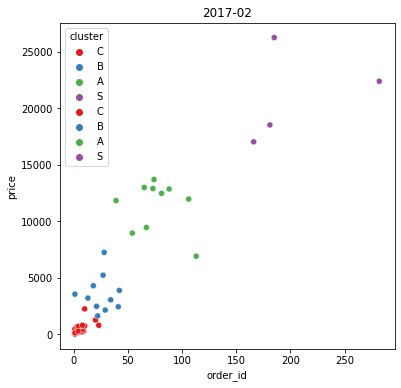

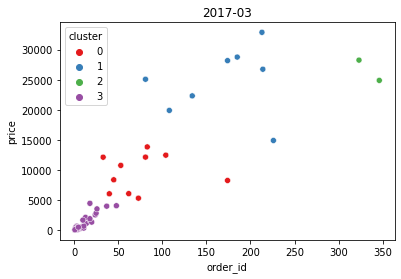

RED: B
BLUE: A
GREEN: S
PURPLE: C


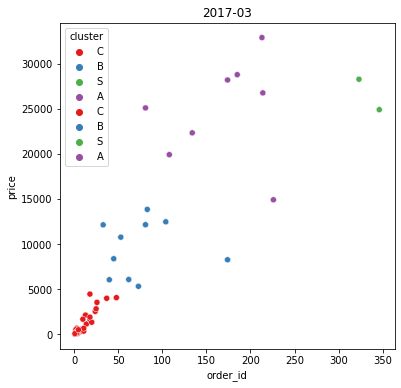

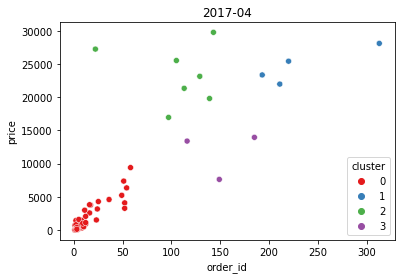

RED: C
BLUE: S
GREEN: A
PURPLE: B


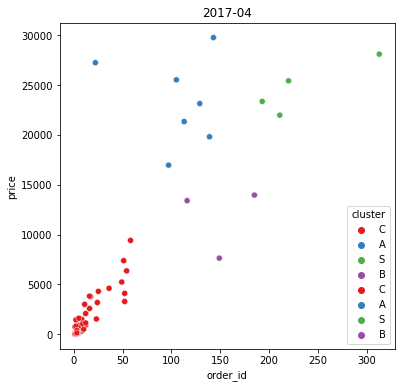

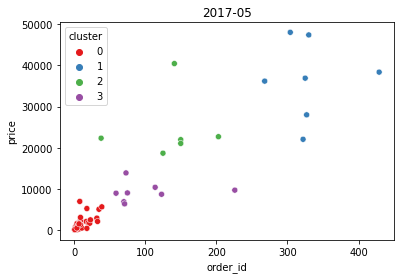

RED: C
BLUE: S
GREEN: A
PURPLE: B


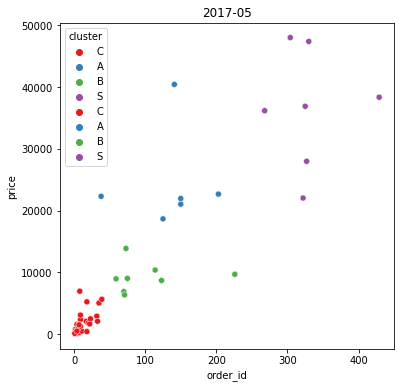

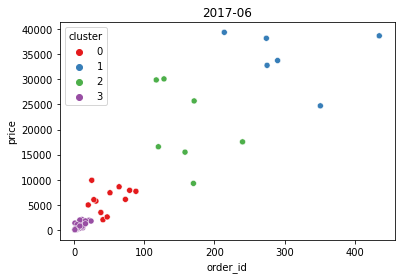

RED: B
BLUE: S
GREEN: A
PURPLE: C


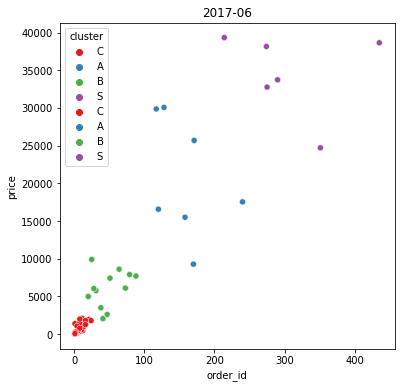

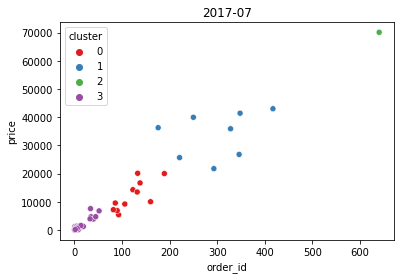

RED: B
BLUE: A
GREEN: S
PURPLE: C


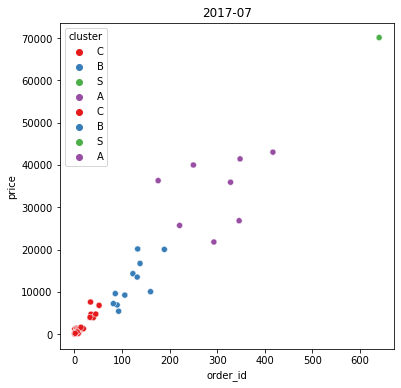

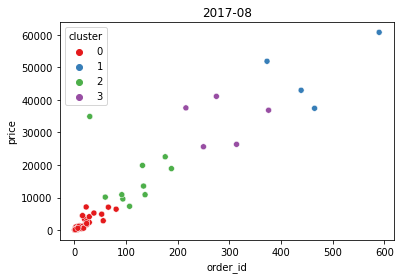

RED: C
BLUE: S
GREEN: B
PURPLE: A


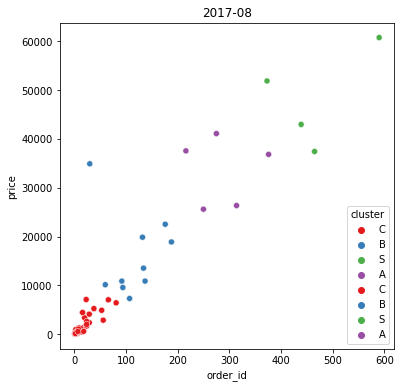

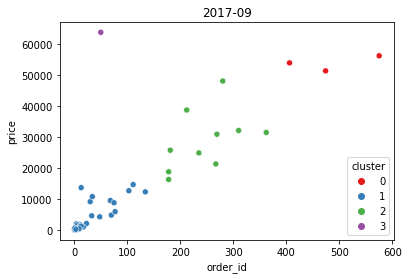

RED: S
BLUE: C
GREEN: A
PURPLE: O


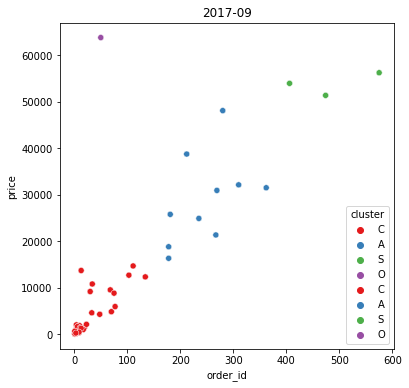

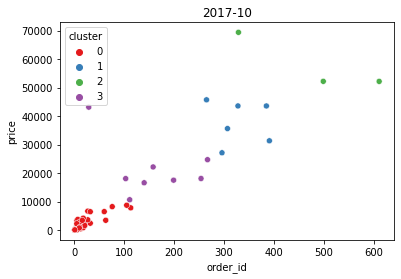

RED: C
BLUE: A
GREEN: S
PURPLE: B


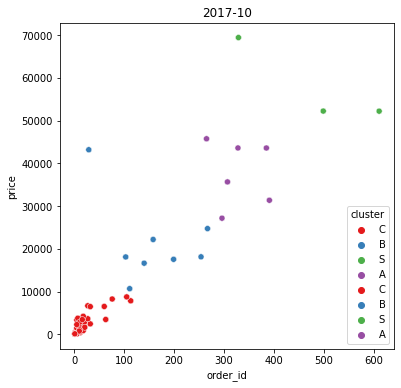

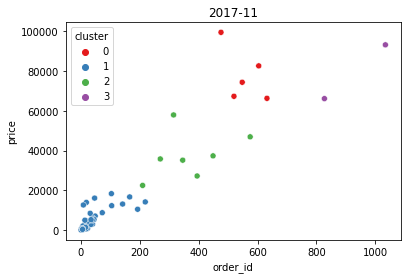

RED: A
BLUE: C
GREEN: B
PURPLE: S


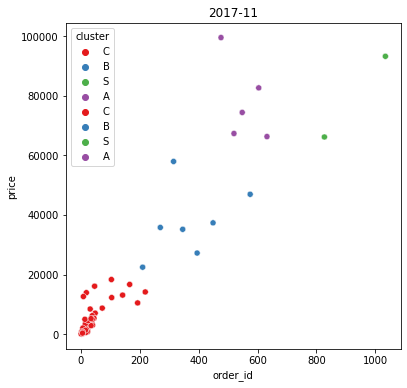

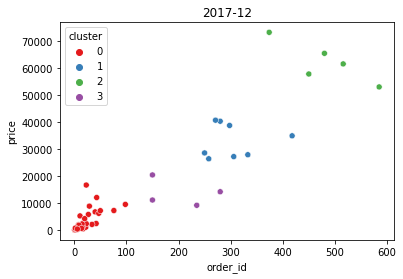

RED: C
BLUE: A
GREEN: S
PURPLE: B


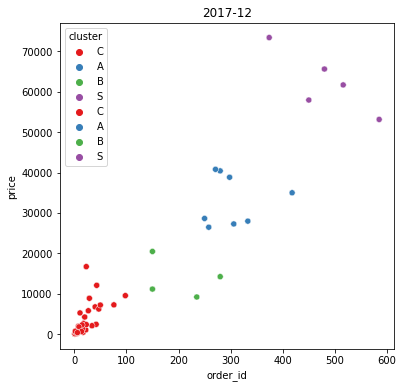

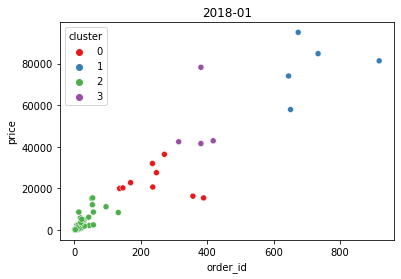

RED: B
BLUE: S
GREEN: C
PURPLE: A


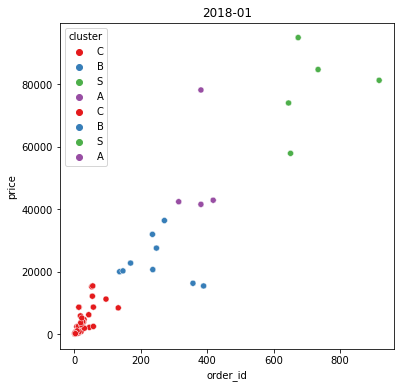

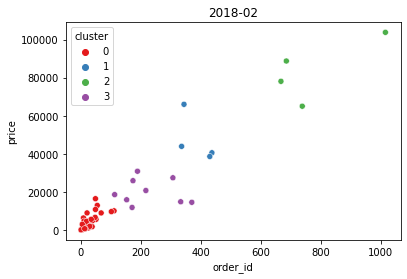

RED: C
BLUE: A
GREEN: S
PURPLE: B


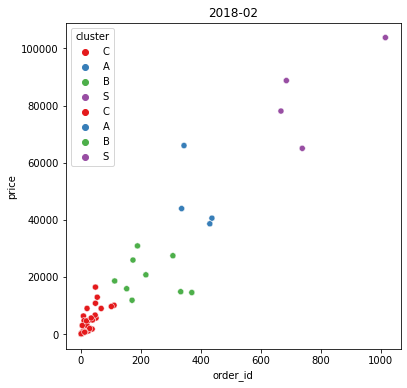

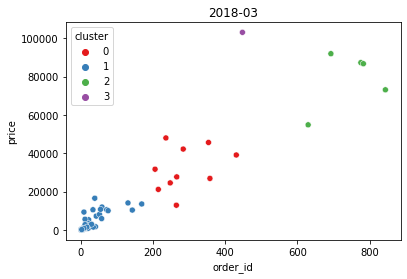

RED: B
BLUE: C
GREEN: S
PURPLE: A


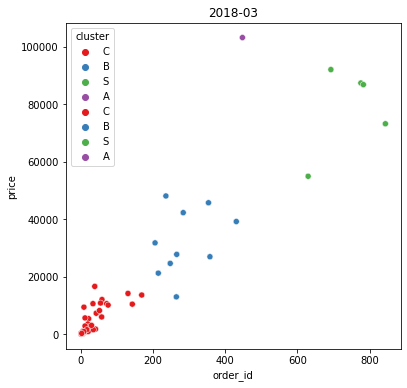

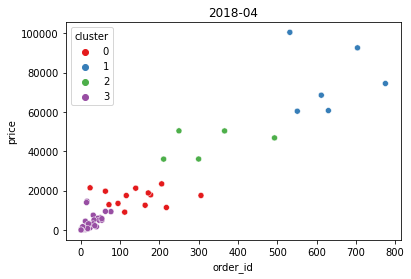

RED: B
BLUE: S
GREEN: A
PURPLE: C


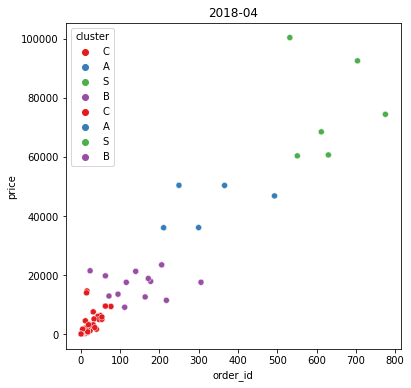

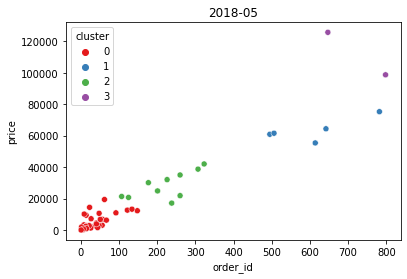

RED: C
BLUE: A
GREEN: B
PURPLE: S


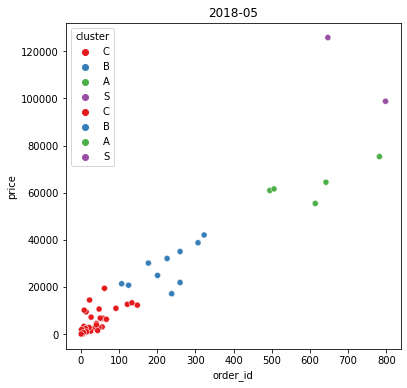

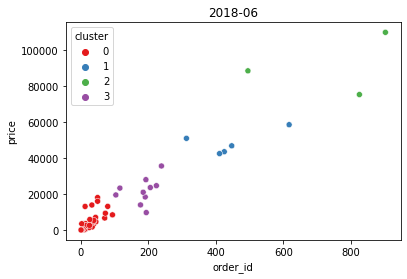

RED: C
BLUE: A
GREEN: S
PURPLE: B


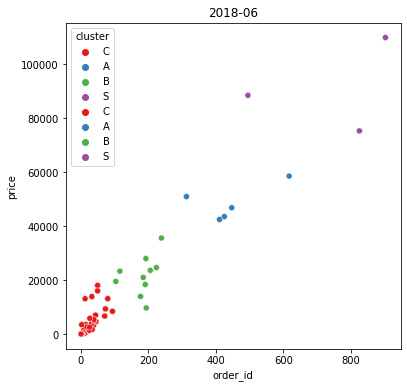

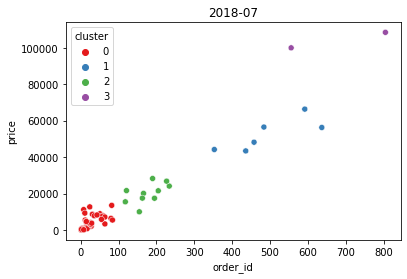

RED: C
BLUE: A
GREEN: B
PURPLE: S


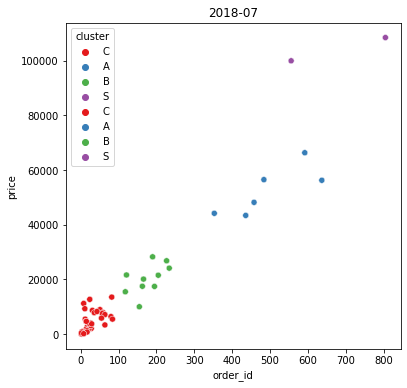

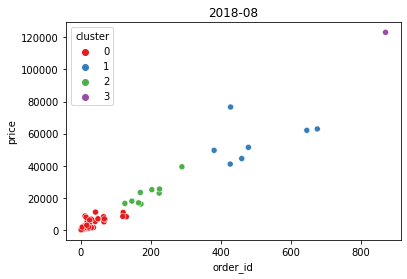

RED: C
BLUE: A
GREEN: B
PURPLE: S


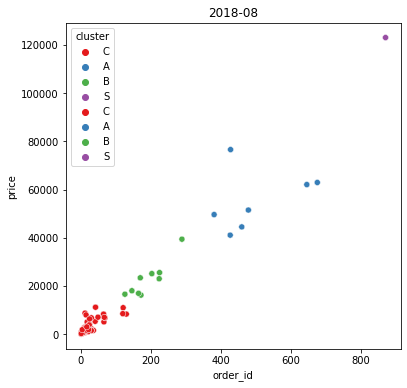

In [ ]:
for key, value in market_tier_dict.items():
    if  type(value) == int:
        print(f'{key}는 nan이므로 패스합니다~')
        pass
    
    elif len(value) < 4:
        print(f'{key}는 길이가 부족{len(value)}하므로 패스합니다~')

    else: 
        sns.scatterplot(data=value, x='order_id', y='price', hue='cluster', palette="Set1")
        plt.title(key)
        plt.show()

        # cluster_tier
        zero = input('RED: ')
        one = input('BLUE: ')
        two = input('GREEN: ')
        three = input('PURPLE: ')
        value = cluster_tier(value, zero, one, two, three)

        sns.scatterplot(data=value, x='order_id', y='price', hue='cluster', palette="Set1")
        plt.title(key)
        plt.show()

In [ ]:
display(market_tier_dict['2018-08'][(market_tier_dict['2018-08']['cluster'] == 'A')])
display(market_tier_dict['2018-08'][(market_tier_dict['2018-08']['cluster'] == 'B')])

0     False
1     False
2     False
3     False
4     False
      ...  
60    False
61    False
62    False
63    False
64    False
Name: cluster, Length: 65, dtype: bool

In [ ]:
# condition = (market_tier_dict['2018-08']['cluster'] == 'A') or (market_tier_dict['2018-08']['cluster'] == 'S')
print('2018-01')
display(market_tier_dict['2018-01'].loc[(market_tier_dict['2018-01']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-02')
display(market_tier_dict['2018-02'].loc[(market_tier_dict['2018-02']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-03')
display(market_tier_dict['2018-03'].loc[(market_tier_dict['2018-03']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-04')
display(market_tier_dict['2018-04'].loc[(market_tier_dict['2018-04']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-05')
display(market_tier_dict['2018-05'].loc[(market_tier_dict['2018-05']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-06')
display(market_tier_dict['2018-06'].loc[(market_tier_dict['2018-06']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-07')
display(market_tier_dict['2018-07'].loc[(market_tier_dict['2018-07']['cluster'].isin(['S', 'A']))].sort_values('cluster'))
print('2018-08')
display(market_tier_dict['2018-08'].loc[(market_tier_dict['2018-08']['cluster'].isin(['S', 'A']))].sort_values('cluster'))

In [ ]:
# 우선 kmeans로 등급 나눈다음에 해야할 듯
round(evaluation_table(df_1801)[['price_mean', 'order_mean', 'price_std', 'order_std']].describe(), 2)

,price_mean,order_mean,price_std,order_std
count,66.00,66.00,66.00,66.00
mean,641.43,4.45,701571.18,56.27
std,1104.97,3.47,1927352.60,142.60
min,24.97,1.00,0.00,0.00
25%,202.42,2.42,4402.24,0.54
50%,394.50,3.17,115666.72,3.26
75%,634.16,5.00,415114.51,16.98
max,8648.00,18.25,11022197.15,743.22


In [ ]:
evaluation_table_dict['2018-01'].columns, market_tier_dict['2018-01'].columns

(Index(['product_category_name', 'order_id', 'product_id', 'seller_id', 'price',
        'price_mean', 'order_mean', 'price_std', 'order_std'],
       dtype='object'),
 Index(['order_id', 'price', 'cluster', 'product_category_name'], dtype='object'))

In [ ]:
pd.merge(evaluation_table_dict['2018-01'], market_tier_dict['2018-01'],on=['order_id', 'price', 'product_category_name']).head(2)

,product_category_name,order_id,product_id,seller_id,price,price_mean,order_mean,price_std,order_std,cluster
0,agro_industry_and_commerce,18,10,5,5853.44,1170.69,3.60,791594.61,11.12,C
1,air_conditioning,29,16,12,4674.74,389.56,2.42,105378.74,0.79,C


In [ ]:
merge_lst = []
for key, val in market_tier_dict.items():
    if type(val) == int:
        print(f'{key}는 패스~')
        merge_lst.append(0)
    
    else:
        a = pd.merge(val, evaluation_table_dict[key], on=['order_id', 'price', 'product_category_name'])
        print(a.shape)
        merge_lst.append(a)

2016-09는 패스~
(31, 10)
2016-12는 패스~
(43, 10)
(51, 10)
(53, 10)
(58, 10)
(59, 10)
(60, 10)
(61, 10)
(63, 10)
(65, 10)
(63, 10)
(65, 10)
(62, 10)
(66, 10)
(64, 10)
(66, 10)
(68, 10)
(64, 10)
(64, 10)
(66, 10)
(65, 10)


In [ ]:
merge_dict = dict(zip(ym, merge_lst))
len(merge_dict)

23

In [ ]:
merge_dict['2018-01'].head(2)

,order_id,price,cluster,product_category_name,product_id,seller_id,price_mean,order_mean,price_std,order_std
0,18,5853.44,C,agro_industry_and_commerce,10,5,1170.69,3.60,791594.61,11.12
1,29,4674.74,C,air_conditioning,16,12,389.56,2.42,105378.74,0.79


In [ ]:
final_lst = []
for key, val in merge_dict.items():
    if type(val) == int:
        print(f'{key}는 패스~')
        final_lst.append(0)

    else:
        final_lst.append(val.loc[val['cluster'].isin(['S', 'A'])].sort_values('cluster'))

2016-09는 패스~
2016-12는 패스~


In [ ]:
final_dict = dict(zip(ym, final_lst))

In [ ]:
len(final_dict)

23

In [ ]:
final_dict['2018-08']

,order_id,price,cluster,product_category_name,product_id,seller_id,price_mean,order_mean,price_std,order_std
5,381,49609.15,A,auto,244,117,424.01,3.26,566954.52,11.74
7,676,62928.29,A,bed_bath_table,427,89,707.06,7.60,520801.01,55.77
14,427,41069.30,A,computers_accessories,193,80,513.37,5.34,384331.94,43.45
36,460,44495.97,A,furniture_decor,266,105,423.77,4.38,639575.78,62.14
44,646,62064.45,A,housewares,390,178,348.68,3.63,144221.87,8.62
60,479,51487.59,A,sports_leisure,323,151,340.98,3.17,139563.31,7.85
64,428,76581.87,A,watches_gifts,205,36,2127.27,11.89,5254153.51,467.91
39,871,123080.37,S,health_beauty,461,178,691.46,4.89,1061168.63,34.99


In [ ]:
for key, val in final_dict.items():
    if type(val) == int:
        print(f'{key}는 패스~')
        pass

    else:
        final_dict[key] = val[['product_category_name', 'cluster', 'order_id', 'price', 'seller_id', 'price_mean', 'order_mean', 'price_std', 'order_std']]
        final_dict[key].columns = ['category', 'cluster', 'orders', 'price', 'sellers', 'price_mean', 'order_mean', 'price_std', 'order_std']

2016-09는 패스~
2016-12는 패스~


In [ ]:
467.02 * 91

42498.82

### 표준화
![Untitled](https://t1.daumcdn.net/cfile/tistory/2577E53F57D6C56A28)

In [ ]:
final_dict['2018-06'].sort_values(['cluster', 'orders'])

,category,cluster,orders,price,sellers,price_mean,order_mean,price_std,order_std
4,auto,A,313,50984.63,107,476.49,2.93,548191.87,7.30
35,furniture_decor,A,411,42498.52,91,467.02,4.52,634414.32,62.41
13,computers_accessories,A,425,43550.81,75,580.68,5.67,447760.81,39.62
58,sports_leisure,A,447,46836.38,138,339.39,3.24,92541.17,6.96
44,housewares,A,617,58575.16,163,359.36,3.79,172058.80,14.24
63,watches_gifts,S,495,88517.26,35,2529.06,14.14,7783221.31,458.18
6,bed_bath_table,S,825,75324.86,87,865.80,9.48,1142184.21,103.73
38,health_beauty,S,902,109912.51,171,642.76,5.27,1341381.29,67.25


In [ ]:
def standardization(df, col):
    m = (df[col].describe()).loc['mean']
    s = (df[col].describe()).loc['std']
    z = (df[col] - m)/s
    return z

In [ ]:
final_dict['2018-01']

,category,cluster,orders,price,sellers,price_mean,order_mean,price_std,order_std
18,cool_stuff,A,314,42420.05,68,623.82,4.62,760174.96,74.02
45,housewares,A,381,41571.18,102,407.56,3.74,185505.09,13.19
61,stationery,A,418,42896.29,41,1046.25,10.20,5156249.39,501.42
65,watches_gifts,A,381,78205.02,32,2443.91,11.91,9672188.01,260.98
6,bed_bath_table,S,918,81298.51,65,1250.75,14.12,3783265.33,318.27
13,computers_accessories,S,734,84761.99,81,1046.44,9.06,1454347.08,108.92
36,furniture_decor,S,651,57910.55,95,609.58,6.85,868165.92,123.46
40,health_beauty,S,645,74041.58,120,617.01,5.38,509978.06,35.58
60,sports_leisure,S,674,94995.50,149,637.55,4.52,679429.08,21.19


In [ ]:
for key, val in final_dict.items():
    if type(val) == int:
        print(f'{key}는 패스~')
        pass

    else:
        final_dict[key]['z_price_mean'] = standardization(val, 'price_mean')
        final_dict[key]['z_order_mean'] = standardization(val, 'order_mean')
        final_dict[key]['z_price_std'] = standardization(val, 'price_std') * -1
        final_dict[key]['z_order_std'] = standardization(val, 'order_std') * -1
        final_dict[key]['z_total'] = final_dict[key]['z_price_mean'] + final_dict[key]['z_order_mean'] + final_dict[key]['z_price_std'] + final_dict[key]['z_order_std']
        final_dict[key]['z_total'] = round(final_dict[key]['z_total'], 2)
        final_dict[key]['z_order'] = final_dict[key]['z_order_mean'] + final_dict[key]['z_order_std']
        final_dict[key]['z_order'] = round(final_dict[key]['z_order'], 2)
        final_dict[key]['z_price'] = final_dict[key]['z_price_mean'] + final_dict[key]['z_price_std']
        final_dict[key]['z_price'] = round(final_dict[key]['z_price'], 2)


2016-09는 패스~
2016-12는 패스~


In [ ]:
final_dict['2017-06']

,category,cluster,orders,price,sellers,price_mean,order_mean,price_std,order_std,z_price_mean,z_order_mean,z_price_std,z_order_std,z_total,z_order,z_price
4,auto,A,117,29877.59,28,1067.06,4.18,5162392.04,25.29,0.395336,-0.694052,1.329597,-0.629336,0.40,-1.32,1.72
31,furniture_decor,A,240,17551.34,57,307.92,4.21,50986.07,18.17,-0.870788,-0.684223,-0.665981,-0.772685,-2.99,-1.46,-1.54
33,garden_tools,A,120,16575.67,39,425.02,3.08,141448.53,8.24,-0.675484,-1.054435,-0.630663,-0.972609,-3.33,-2.03,-1.31
49,perfumery,A,171,25696.76,21,1223.66,8.14,2276648.70,109.01,0.656519,0.603326,0.202955,1.056224,2.52,1.66,0.86
57,telephony,A,170,9283.54,19,488.61,8.95,499817.51,58.45,-0.569426,0.868699,-0.490750,0.038284,-0.15,0.91,-1.06
58,toys,A,158,15506.35,43,360.61,3.67,137720.59,11.06,-0.782910,-0.861138,-0.632118,-0.915833,-3.19,-1.78,-1.42
59,watches_gifts,A,128,30083.50,12,2506.96,10.67,8813723.03,87.19,2.796858,1.432206,2.755137,0.616915,7.60,2.05,5.55
6,bed_bath_table,S,435,38658.19,33,1171.46,13.18,1699522.98,157.56,0.569458,2.254534,-0.022365,2.033696,4.84,4.29,0.55
12,computers_accessories,S,274,38171.45,50,763.43,5.48,676129.26,28.54,-0.111070,-0.268145,-0.421915,-0.563903,-1.37,-0.83,-0.53
15,cool_stuff,S,214,39352.11,39,1009.03,5.49,2287316.71,131.12,0.298551,-0.264869,0.207119,1.501371,1.74,1.24,0.51


In [ ]:
final_dict['2017-06'][['category', 'cluster', 'z_total', 'z_order', 'z_price']]

,category,cluster,z_total,z_order,z_price
4,auto,A,0.40,-1.32,1.72
31,furniture_decor,A,-2.99,-1.46,-1.54
33,garden_tools,A,-3.33,-2.03,-1.31
49,perfumery,A,2.52,1.66,0.86
57,telephony,A,-0.15,0.91,-1.06
58,toys,A,-3.19,-1.78,-1.42
59,watches_gifts,A,7.60,2.05,5.55
6,bed_bath_table,S,4.84,4.29,0.55
12,computers_accessories,S,-1.37,-0.83,-0.53
15,cool_stuff,S,1.74,1.24,0.51


In [ ]:
criteria_lst = []
for key, val in final_dict.items():
    if type(val) == int:
        print(f'{key}는 패스~')
        criteria_lst.append(0)

    else:
        criteria_lst.append(val[['category', 'cluster', 'z_total', 'z_order', 'z_price']].sort_values(['cluster', 'z_total'], ascending=False))

2016-09는 패스~
2016-12는 패스~


In [ ]:
criteria_dict = dict(zip(ym, criteria_lst))

In [ ]:
criteria_dict['2018-06']

,category,cluster,z_total,z_order,z_price
63,watches_gifts,S,9.35,4.50,4.85
6,bed_bath_table,S,0.90,0.93,-0.03
38,health_beauty,S,-0.67,-0.41,-0.26
13,computers_accessories,A,-1.18,-0.49,-0.70
35,furniture_decor,A,-1.42,-0.64,-0.78
4,auto,A,-2.22,-1.42,-0.80
44,housewares,A,-2.25,-1.15,-1.11
58,sports_leisure,A,-2.50,-1.34,-1.17


,price_mean,order_mean,price_std,order_std
count,8.00,8.00,8.00,8.00
mean,782.57,6.13,1520219.22,94.96
std,725.68,3.84,2567253.79,150.64
min,339.39,2.93,92541.17,6.96
25%,440.10,3.65,378835.31,12.50
50%,528.58,4.89,591303.10,51.02
75%,698.52,6.62,1191983.48,76.37
max,2529.06,14.14,7783221.31,458.18


In [ ]:
lst_1801 = final_dict['2018-01']['category'].values.tolist()
lst_1802 = final_dict['2018-02']['category'].values.tolist()
lst_1803 = final_dict['2018-03']['category'].values.tolist()
lst_1804 = final_dict['2018-04']['category'].values.tolist()
lst_1805 = final_dict['2018-05']['category'].values.tolist()
lst_1806 = final_dict['2018-06']['category'].values.tolist()
lst_1807 = final_dict['2018-07']['category'].values.tolist()
lst_1808 = final_dict['2018-08']['category'].values.tolist()